In [36]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import FreqDist
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [38]:
!pip install nltk
!pip install gensim
!pip install wordcloud
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 220 kB 992 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=157998 sha256=1f418a4ea95d5c9616ac60b7e580cfe846f6d7e67fb17d348de7e0daa3a6101f
  Stored in directory: /Users/anmarphy/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anmarphy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anmarphy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The text was extracted from https://en.wikipedia.org/wiki/The_7_Habits_of_Highly_Effective_People

In [3]:
text='The 7 Habits of Highly Effective People, first published in 1989, is a business and self-help book written by \
 Stephen R. Covey.[1] Covey presents an approach to being effective in attaining goals by aligning oneself to what \
he calls "true north" principles based on a character ethic that he presents as universal and timeless.\
Covey defines effectiveness as the balance of obtaining desirable results with caring for that which produces \
those results. He illustrates this by referring to the fable of the goose that laid the golden eggs. He further \
claims that effectiveness can be expressed in terms of the P/PC ratio, where P refers to getting desired results \
and PC is caring for that which produces the results. \
Coveys best-known book has sold more than 25 million copies worldwide since its first publication. \
The audio version became the first non-fiction audio-book in U.S. publishing history to sell more than one million \
copies. Covey argues against what he calls "the personality ethic", that he sees as prevalent in many modern \
self-help books. He promotes what he labels "the character ethic": aligning ones values with so-called universal \
and timeless principles. In doing this, Covey distinguishes principles and values. He sees principles as external  \
natural laws, while values remain internal and subjective. Our values govern our behavior, while principles \
ultimately determine the consequences. Covey presents his teachings in a series of habits, manifesting \
as a progression from dependence through independence on to interdependence.'
print(text)

The 7 Habits of Highly Effective People, first published in 1989, is a business and self-help book written by  Stephen R. Covey.[1] Covey presents an approach to being effective in attaining goals by aligning oneself to what he calls "true north" principles based on a character ethic that he presents as universal and timeless.Covey defines effectiveness as the balance of obtaining desirable results with caring for that which produces those results. He illustrates this by referring to the fable of the goose that laid the golden eggs. He further claims that effectiveness can be expressed in terms of the P/PC ratio, where P refers to getting desired results and PC is caring for that which produces the results. Coveys best-known book has sold more than 25 million copies worldwide since its first publication. The audio version became the first non-fiction audio-book in U.S. publishing history to sell more than one million copies. Covey argues against what he calls "the personality ethic", t

## Tokenization

#### Sentences

In [4]:
sentences=sent_tokenize(text)
sentences

['The 7 Habits of Highly Effective People, first published in 1989, is a business and self-help book written by  Stephen R.',
 'Covey.',
 '[1] Covey presents an approach to being effective in attaining goals by aligning oneself to what he calls "true north" principles based on a character ethic that he presents as universal and timeless.Covey defines effectiveness as the balance of obtaining desirable results with caring for that which produces those results.',
 'He illustrates this by referring to the fable of the goose that laid the golden eggs.',
 'He further claims that effectiveness can be expressed in terms of the P/PC ratio, where P refers to getting desired results and PC is caring for that which produces the results.',
 'Coveys best-known book has sold more than 25 million copies worldwide since its first publication.',
 'The audio version became the first non-fiction audio-book in U.S. publishing history to sell more than one million copies.',
 'Covey argues against what he c

In [5]:
len(sentences)

13

In [37]:
token_sent= (len(nltk.word_tokenize(x)) for x in sentences)
print('The average number of tokens by sentence is:', np.round( sum(token_sent)/len(sentences),2))

The average number of tokens by sentence is: 20.85


#### Words

In [6]:
words=word_tokenize(text)
words[0:10]

['The',
 '7',
 'Habits',
 'of',
 'Highly',
 'Effective',
 'People',
 ',',
 'first',
 'published']

## Normalization

#### Lower case

In [7]:
tokens=[word.lower() for word in words]
tokens[0:10]

['the',
 '7',
 'habits',
 'of',
 'highly',
 'effective',
 'people',
 ',',
 'first',
 'published']

#### Removing special characters

In [8]:
tokens = [re.sub(r'[.,"]', '',token) for token in tokens] # ., and " replaced with '' 
print(tokens)

['the', '7', 'habits', 'of', 'highly', 'effective', 'people', '', 'first', 'published', 'in', '1989', '', 'is', 'a', 'business', 'and', 'self-help', 'book', 'written', 'by', 'stephen', 'r', '', 'covey', '', '[', '1', ']', 'covey', 'presents', 'an', 'approach', 'to', 'being', 'effective', 'in', 'attaining', 'goals', 'by', 'aligning', 'oneself', 'to', 'what', 'he', 'calls', '``', 'true', 'north', "''", 'principles', 'based', 'on', 'a', 'character', 'ethic', 'that', 'he', 'presents', 'as', 'universal', 'and', 'timelesscovey', 'defines', 'effectiveness', 'as', 'the', 'balance', 'of', 'obtaining', 'desirable', 'results', 'with', 'caring', 'for', 'that', 'which', 'produces', 'those', 'results', '', 'he', 'illustrates', 'this', 'by', 'referring', 'to', 'the', 'fable', 'of', 'the', 'goose', 'that', 'laid', 'the', 'golden', 'eggs', '', 'he', 'further', 'claims', 'that', 'effectiveness', 'can', 'be', 'expressed', 'in', 'terms', 'of', 'the', 'p/pc', 'ratio', '', 'where', 'p', 'refers', 'to', 'get

#### Removing words shorter than 4 char

In [9]:
tokens_4 = []
for token in tokens:
    if len(token) > 3:
        tokens_4.append(token)
tokens = tokens_4

print(tokens)

['habits', 'highly', 'effective', 'people', 'first', 'published', '1989', 'business', 'self-help', 'book', 'written', 'stephen', 'covey', 'covey', 'presents', 'approach', 'being', 'effective', 'attaining', 'goals', 'aligning', 'oneself', 'what', 'calls', 'true', 'north', 'principles', 'based', 'character', 'ethic', 'that', 'presents', 'universal', 'timelesscovey', 'defines', 'effectiveness', 'balance', 'obtaining', 'desirable', 'results', 'with', 'caring', 'that', 'which', 'produces', 'those', 'results', 'illustrates', 'this', 'referring', 'fable', 'goose', 'that', 'laid', 'golden', 'eggs', 'further', 'claims', 'that', 'effectiveness', 'expressed', 'terms', 'p/pc', 'ratio', 'where', 'refers', 'getting', 'desired', 'results', 'caring', 'that', 'which', 'produces', 'results', 'coveys', 'best-known', 'book', 'sold', 'more', 'than', 'million', 'copies', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'became', 'first', 'non-fiction', 'audio-book', 'publishing', 'history',

#### Stop words

In [10]:
stopWords = set(stopwords.words('english'))

In [11]:
tokens_n_e = []

for token in tokens:
    if token not in stopWords:
        tokens_n_e.append(token)

tokens = tokens_n_e
print(tokens)

['habits', 'highly', 'effective', 'people', 'first', 'published', '1989', 'business', 'self-help', 'book', 'written', 'stephen', 'covey', 'covey', 'presents', 'approach', 'effective', 'attaining', 'goals', 'aligning', 'oneself', 'calls', 'true', 'north', 'principles', 'based', 'character', 'ethic', 'presents', 'universal', 'timelesscovey', 'defines', 'effectiveness', 'balance', 'obtaining', 'desirable', 'results', 'caring', 'produces', 'results', 'illustrates', 'referring', 'fable', 'goose', 'laid', 'golden', 'eggs', 'claims', 'effectiveness', 'expressed', 'terms', 'p/pc', 'ratio', 'refers', 'getting', 'desired', 'results', 'caring', 'produces', 'results', 'coveys', 'best-known', 'book', 'sold', 'million', 'copies', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'became', 'first', 'non-fiction', 'audio-book', 'publishing', 'history', 'sell', 'million', 'copies', 'covey', 'argues', 'calls', 'personality', 'ethic', 'sees', 'prevalent', 'many', 'modern', 'self-help', 'b

In [14]:
f=FreqDist(tokens)
f

FreqDist({'covey': 5, 'principles': 5, 'results': 4, 'values': 4, 'first': 3, 'presents': 3, 'ethic': 3, 'habits': 2, 'effective': 2, 'self-help': 2, ...})

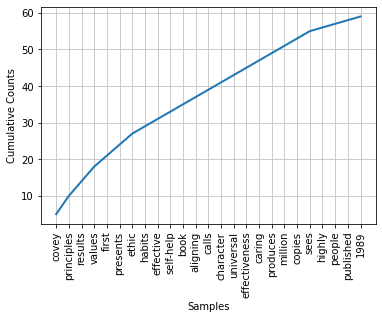

In [26]:
f.plot(25, cumulative=True)
plt.show()

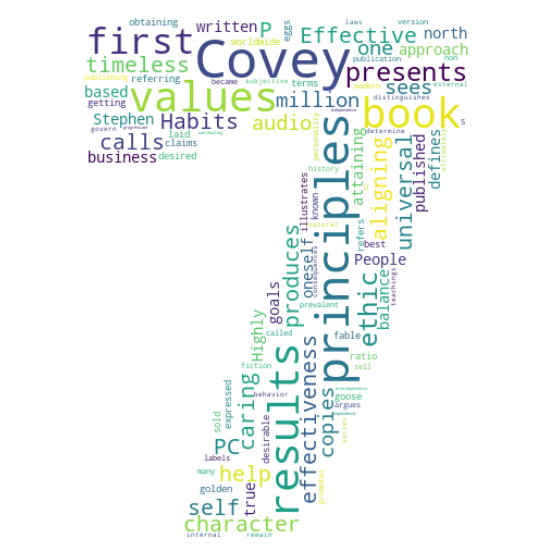

In [65]:
custom_mask = np.array(Image.open("7_pic.jpeg"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Lemmatize 
#### (Morphologic analysis)

In [27]:
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
print("better :", lemmatizer.lemmatize("better", pos ="a")) ## a denotes adj in 'pos'

rocks : rock
corpora : corpus
better : good


#### Verbs

In [28]:
lemma_text =[]
for token in tokens:
    lemma_text.append(WordNetLemmatizer().lemmatize(token, pos='v'))

print('Original: \n ', tokens)
print('\n')
print('Lemmatization Verbs: \n ',lemma_text)

Original: 
  ['habits', 'highly', 'effective', 'people', 'first', 'published', '1989', 'business', 'self-help', 'book', 'written', 'stephen', 'covey', 'covey', 'presents', 'approach', 'effective', 'attaining', 'goals', 'aligning', 'oneself', 'calls', 'true', 'north', 'principles', 'based', 'character', 'ethic', 'presents', 'universal', 'timelesscovey', 'defines', 'effectiveness', 'balance', 'obtaining', 'desirable', 'results', 'caring', 'produces', 'results', 'illustrates', 'referring', 'fable', 'goose', 'laid', 'golden', 'eggs', 'claims', 'effectiveness', 'expressed', 'terms', 'p/pc', 'ratio', 'refers', 'getting', 'desired', 'results', 'caring', 'produces', 'results', 'coveys', 'best-known', 'book', 'sold', 'million', 'copies', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'became', 'first', 'non-fiction', 'audio-book', 'publishing', 'history', 'sell', 'million', 'copies', 'covey', 'argues', 'calls', 'personality', 'ethic', 'sees', 'prevalent', 'many', 'modern', 's

#### Nouns

In [29]:
for i in range(len(lemma_text )):
    lemma_text[i] = WordNetLemmatizer().lemmatize(lemma_text[i], pos='n')
print(lemma_text)

['habit', 'highly', 'effective', 'people', 'first', 'publish', '1989', 'business', 'self-help', 'book', 'write', 'stephen', 'covey', 'covey', 'present', 'approach', 'effective', 'attain', 'goal', 'align', 'oneself', 'call', 'true', 'north', 'principle', 'base', 'character', 'ethic', 'present', 'universal', 'timelesscovey', 'define', 'effectiveness', 'balance', 'obtain', 'desirable', 'result', 'care', 'produce', 'result', 'illustrate', 'refer', 'fable', 'goose', 'lay', 'golden', 'egg', 'claim', 'effectiveness', 'express', 'term', 'p/pc', 'ratio', 'refer', 'get', 'desire', 'result', 'care', 'produce', 'result', 'covey', 'best-known', 'book', 'sell', 'million', 'copy', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'become', 'first', 'non-fiction', 'audio-book', 'publish', 'history', 'sell', 'million', 'copy', 'covey', 'argue', 'call', 'personality', 'ethic', 'see', 'prevalent', 'many', 'modern', 'self-help', 'book', 'promote', 'label', 'character', 'ethic', 'align', 'o

## Stemming

In [30]:
from nltk.stem import PorterStemmer ## Most common English stemmer
ps = PorterStemmer()

for i in range(len(lemma_text)):
    lemma_text[i] = ps.stem(lemma_text[i])
print(lemma_text)

['habit', 'highli', 'effect', 'peopl', 'first', 'publish', '1989', 'busi', 'self-help', 'book', 'write', 'stephen', 'covey', 'covey', 'present', 'approach', 'effect', 'attain', 'goal', 'align', 'oneself', 'call', 'true', 'north', 'principl', 'base', 'charact', 'ethic', 'present', 'univers', 'timelesscovey', 'defin', 'effect', 'balanc', 'obtain', 'desir', 'result', 'care', 'produc', 'result', 'illustr', 'refer', 'fabl', 'goos', 'lay', 'golden', 'egg', 'claim', 'effect', 'express', 'term', 'p/pc', 'ratio', 'refer', 'get', 'desir', 'result', 'care', 'produc', 'result', 'covey', 'best-known', 'book', 'sell', 'million', 'copi', 'worldwid', 'sinc', 'first', 'public', 'audio', 'version', 'becom', 'first', 'non-fict', 'audio-book', 'publish', 'histori', 'sell', 'million', 'copi', 'covey', 'argu', 'call', 'person', 'ethic', 'see', 'preval', 'mani', 'modern', 'self-help', 'book', 'promot', 'label', 'charact', 'ethic', 'align', 'one', 'valu', 'so-cal', 'univers', 'timeless', 'principl', 'covey', 